EXERCISE 6.1

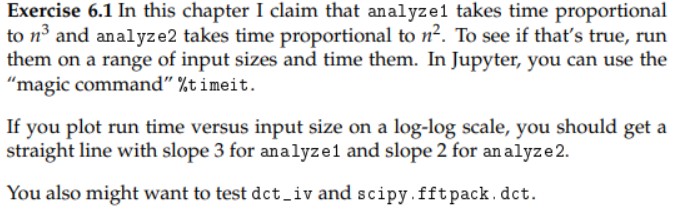

In [1]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
import numpy as np
import matplotlib.pyplot as plt
from thinkdsp import decorate
from thinkdsp import UncorrelatedGaussianNoise
from scipy.stats import linregress
import scipy.fftpack
import timeit



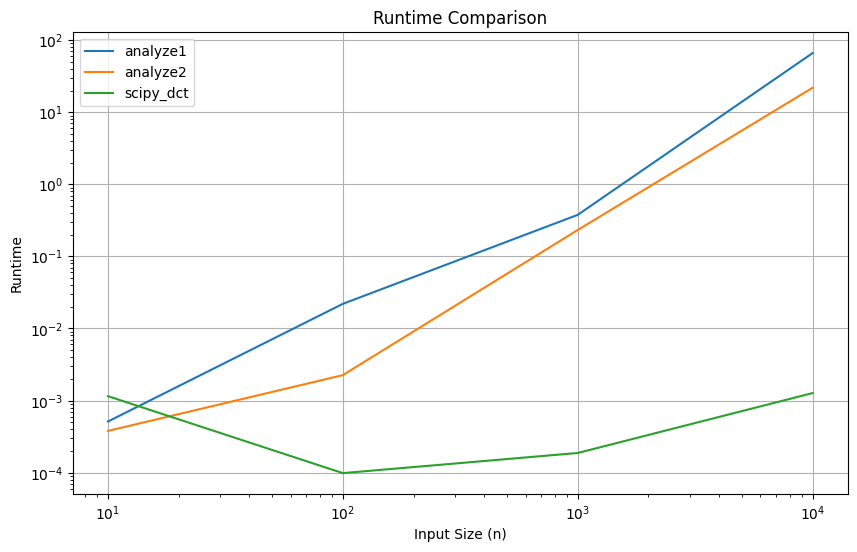

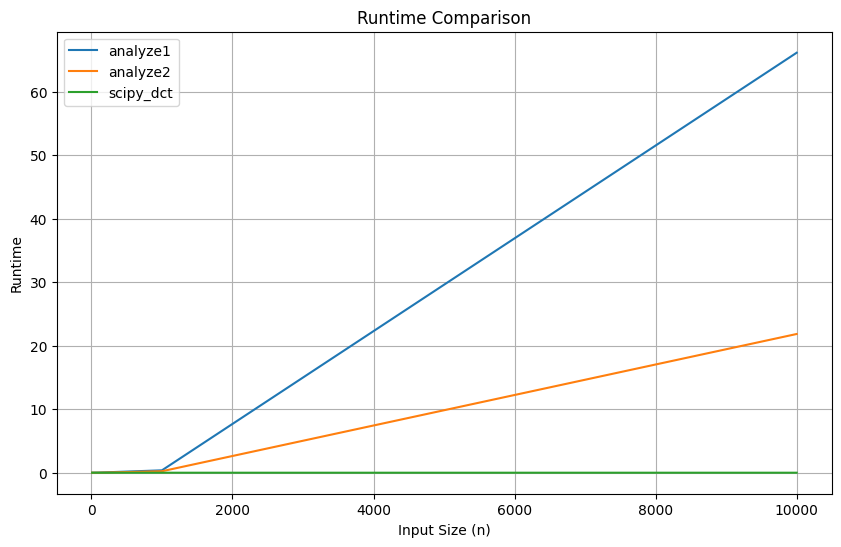

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
import timeit

# Function analyze1
def analyze1(ys, fs, ts):
    args = np.outer(ts, fs)
    M = np.cos(np.pi * 2 * args)
    amps = np.linalg.solve(M, ys)
    return amps

# Function analyze2
def analyze2(ys, fs, ts):
    args = np.outer(ts, fs)
    M = np.cos(np.pi * 2 * args)
    amps = np.dot(M, ys) / 2
    return amps

# Function scipy_dct
def scipy_dct(ys, freqs, ts):
    return fftpack.dct(ys, type=3)

# Test for various sizes of data
sizes = [10**i for i in range(1, 5)]  # Example: 10, 100, 1000, 10000

# save times for each run
times_analyze1 = []
times_analyze2 = []
times_scipy_dct = []

for size in sizes:
    ys = np.random.randn(size)
    fs = np.random.randn(size)
    ts = np.random.randn(size)
    time_analyze1 = timeit.timeit(lambda: analyze1(ys, fs, ts), number=10)
    time_analyze2 = timeit.timeit(lambda: analyze2(ys, fs, ts), number=10)
    time_scipy_dct = timeit.timeit(lambda: scipy_dct(ys, fs, ts), number=10)
    times_analyze1.append(time_analyze1)
    times_analyze2.append(time_analyze2)
    times_scipy_dct.append(time_scipy_dct)

# Plot the graphs on log scale
plt.figure(figsize=(10, 6))
plt.loglog(sizes, times_analyze1, label='analyze1')
plt.loglog(sizes, times_analyze2, label='analyze2')
plt.loglog(sizes, times_scipy_dct, label='scipy_dct')
plt.xlabel('Input Size (n)')
plt.ylabel('Runtime')
plt.title('Runtime Comparison')
plt.legend()
plt.grid(True)
plt.show()


# Plot the graphs on regular scale
plt.figure(figsize=(10, 6))
plt.plot(sizes, times_analyze1, label='analyze1')
plt.plot(sizes, times_analyze2, label='analyze2')
plt.plot(sizes, times_scipy_dct, label='scipy_dct')
plt.xlabel('Input Size (n)')
plt.ylabel('Runtime')
plt.title('Runtime Comparison')
plt.legend()
plt.grid(True)
plt.show()


EXERCISE 6.2

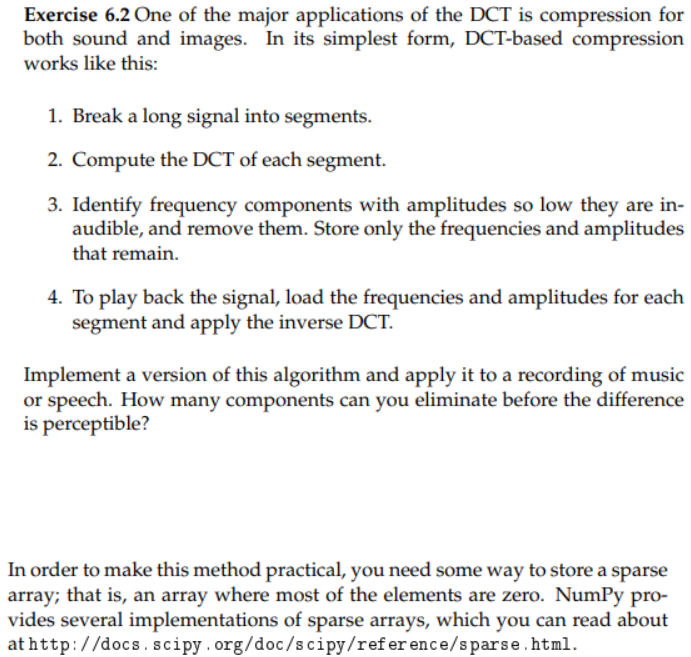

In [3]:
if not os.path.exists('100475__iluppai__saxophone-weep.wav'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/100475__iluppai__saxophone-weep.wav

27814.53762535577
33885.68512522546
26015.448995390343
32236.847959197024
25117.563940381006
29759.550469254053
25244.341668081946
28401.721080525153
26192.184848068617
26357.223982995092
23746.9495668221
26053.985089990805
21001.634591402646
20267.281926343865
12212.548499996432
6967.0161471720385
15411.736865303945
9711.373449054707
61425.37585210475
61455.79756130018


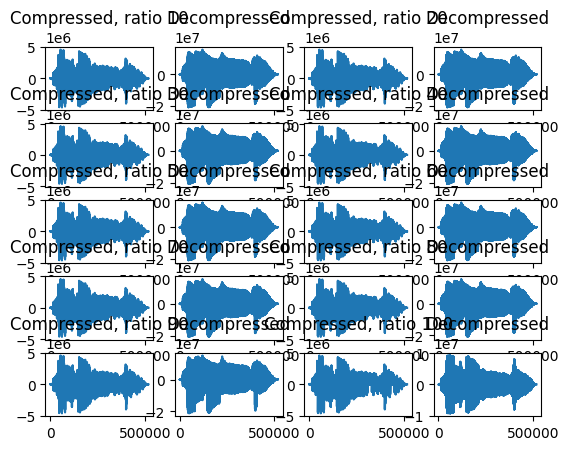

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct, idct
import wave

def dct_compression(signal, compression_ratio):
    segment_length = 1024
    num_segments = len(signal) // segment_length
    compressed_signal = []
    for i in range(num_segments):
        segment = signal[i * segment_length: (i + 1) * segment_length]
        dct_segment = dct(segment)
        threshold = np.percentile(np.abs(dct_segment), compression_ratio)
        compressed_segment = np.where(np.abs(dct_segment) >= threshold, dct_segment, 0)
        compressed_signal.extend(compressed_segment)
    return np.array(compressed_signal)

def dct_decompression(compressed_signal):
    segment_length = 1024
    num_segments = len(compressed_signal) // segment_length
    reconstructed_signal = []
    for i in range(num_segments):
        compressed_segment = compressed_signal[i * segment_length: (i + 1) * segment_length]
        reconstructed_segment = idct(compressed_segment)
        reconstructed_signal.extend(reconstructed_segment)
    return np.array(reconstructed_signal)

with wave.open('100475__iluppai__saxophone-weep.wav', 'rb') as wav_file:
    # Get the audio data
    n_frames = wav_file.getnframes()
    audio_data = np.frombuffer(wav_file.readframes(n_frames), dtype=np.int16)

if wav_file.getnchannels() > 1:
    audio_data = audio_data[::wav_file.getnchannels()]

compression_ratio = 10 
figure, axis = plt.subplots(5, 4)

for i in range(0, 5):
    compressed_signal = dct_compression(audio_data, compression_ratio)
    axis[i, 0].plot(compressed_signal)
    axis[i, 0].set_title(f"Compressed, ratio {compression_ratio}")
    # Perform DCT-based decompression
    reconstructed_signal = dct_decompression(compressed_signal)
    axis[i, 1].plot(reconstructed_signal)
    axis[i, 1].set_title("Decompressed")
    # Calculate the perceptual difference
    differenceY = np.abs(audio_data[0] - reconstructed_signal[0])
    differenceX = np.abs(audio_data[1] - reconstructed_signal[1])
    print(differenceY)
    print(differenceX)
    compression_ratio += 10
    compressed_signal = dct_compression(audio_data, compression_ratio)
    axis[i, 2].plot(compressed_signal)
    axis[i, 2].set_title(f"Compressed, ratio {compression_ratio}")
    # Perform DCT-based decompression
    reconstructed_signal = dct_decompression(compressed_signal)
    axis[i, 3].plot(reconstructed_signal)
    axis[i, 3].set_title("Decompressed")
    # Calculate the perceptual difference
    differenceY = np.abs(audio_data[0] - reconstructed_signal[0])
    differenceX = np.abs(audio_data[1] - reconstructed_signal[1])
    print(differenceY)
    print(differenceX)
    compression_ratio += 10

plt.show()


EXERCISE 6.3

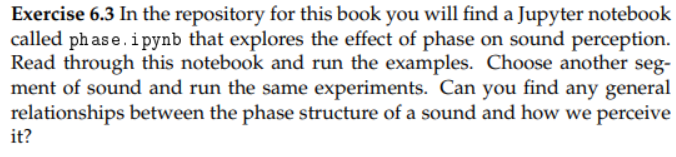

In [5]:
import os

if not os.path.exists('phase.ipynb'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/phase.ipynb

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate
from thinkdsp import SawtoothSignal
from thinkdsp import read_wave

wave = read_wave('100475__iluppai__saxophone-weep.wav')
wave.make_audio()

In [7]:
def plot_angle(spectrum, thresh=1):
    angles = spectrum.angles
    angles[spectrum.amps < thresh] = np.nan
    plt.plot(spectrum.fs, angles, 'x')
    decorate(xlabel='Frequency (Hz)', 
             ylabel='Phase (radian)')

In [8]:
def plot_three(spectrum, thresh=1):
    """Plot amplitude, phase, and waveform.
    
    spectrum: Spectrum object
    thresh: threshold passed to plot_angle
    """
    plt.figure(figsize=(10, 4))
    plt.subplot(1,3,1)
    spectrum.plot()
    plt.subplot(1,3,2)
    plot_angle(spectrum, thresh=thresh)
    plt.subplot(1,3,3)
    wave = spectrum.make_wave()
    wave.unbias()
    wave.normalize()
    wave.segment(duration=0.01).plot()
    display(wave.make_audio())

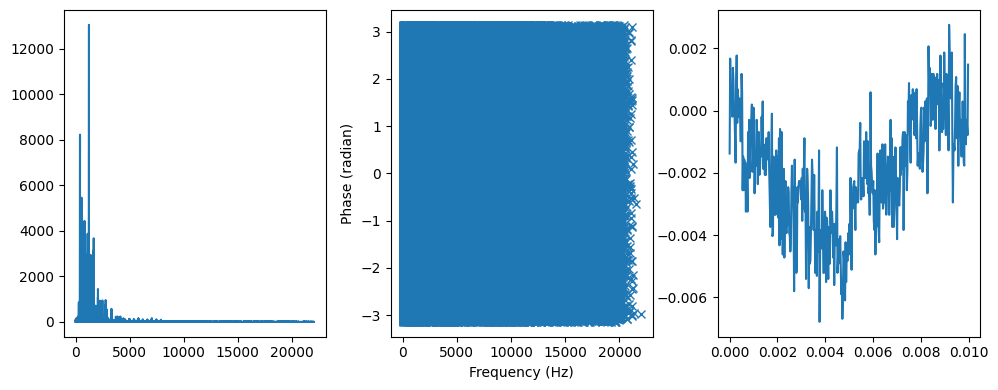

In [9]:
spectrum = wave.make_spectrum()
plot_three(spectrum)

In [10]:
def zero_angle(spectrum):
    res = spectrum.copy()
    res.hs = res.amps
    return res

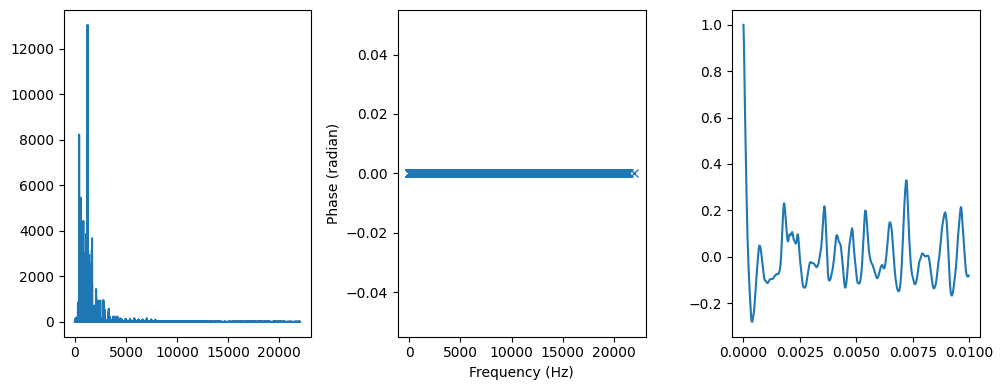

In [11]:
spectrum2 = zero_angle(spectrum)
plot_three(spectrum2)

In [12]:
def rotate_angle(spectrum, offset):
    res = spectrum.copy()
    res.hs *= np.exp(1j * offset)
    return res

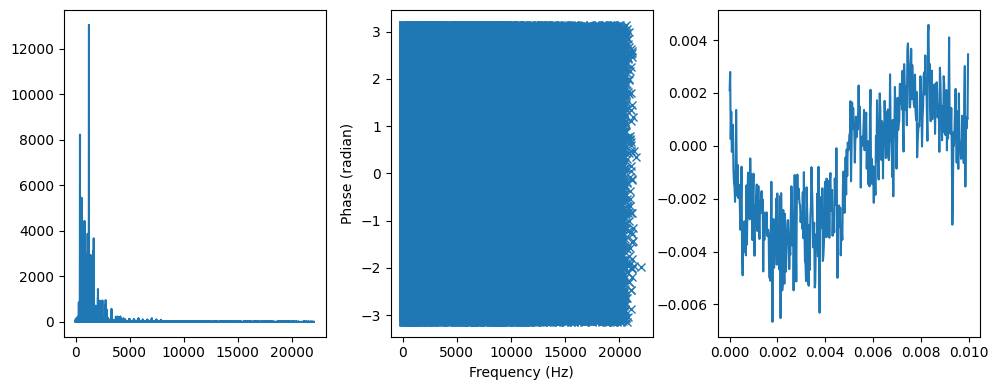

In [13]:
spectrum3 = rotate_angle(spectrum, 1)
plot_three(spectrum3)

In [14]:
PI2 = np.pi * 2

def random_angle(spectrum):
    res = spectrum.copy()
    angles = np.random.uniform(0, PI2, len(spectrum))
    res.hs *= np.exp(1j * angles)
    return res

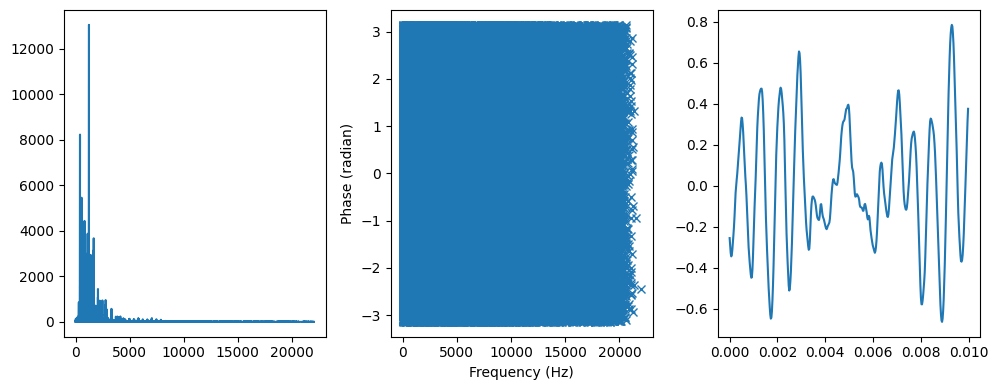

In [15]:
spectrum4 = random_angle(spectrum)
plot_three(spectrum4)

Jednym z rzucających się efektów zmiany fazy dźwięku jest nakładanie się fal. Słychać miejscami, że fale nakładają się i zachodzi wzmocnienie lub wygaszanie. 

EXERCISE 7.1

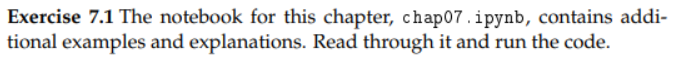

In [16]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

In [17]:
import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate
PI2 = 2 * np.pi

In [18]:
# suppress scientific notation for small numbers
np.set_printoptions(precision=3, suppress=True)

In [19]:
from thinkdsp import Sinusoid

class ComplexSinusoid(Sinusoid):
    """Represents a complex exponential signal."""
    
    def evaluate(self, ts):
        """Evaluates the signal at the given times.

        ts: float array of times
        
        returns: float wave array
        """
        print(ts)
        phases = PI2 * self.freq * ts + self.offset
        print(phases)
        ys = self.amp * np.exp(1j * phases)
        return ys

In [20]:


signal = ComplexSinusoid(freq=1, amp=0.6, offset=1)
wave = signal.make_wave(duration=1, framerate=4)
print(wave.ys)



[0.   0.25 0.5  0.75]
[1.    2.571 4.142 5.712]
[ 0.324+0.505j -0.505+0.324j -0.324-0.505j  0.505-0.324j]


In [21]:
from thinkdsp import SumSignal

def synthesize1(amps, freqs, ts):
    components = [ComplexSinusoid(freq, amp)
                  for amp, freq in zip(amps, freqs)]
    signal = SumSignal(*components)
    ys = signal.evaluate(ts)
    return ys

In [22]:
amps = np.array([0.6, 0.25, 0.1, 0.05])
freqs = [100, 200, 300, 400]
framerate = 11025

ts = np.linspace(0, 1, framerate, endpoint=False)
ys = synthesize1(amps, freqs, ts)
print(ys)

[0. 0. 0. ... 1. 1. 1.]
[  0.      0.057   0.114 ... 628.148 628.205 628.262]
[0. 0. 0. ... 1. 1. 1.]
[   0.       0.114    0.228 ... 1256.295 1256.409 1256.523]
[0. 0. 0. ... 1. 1. 1.]
[   0.       0.171    0.342 ... 1884.443 1884.614 1884.785]
[0. 0. 0. ... 1. 1. 1.]
[   0.       0.228    0.456 ... 2512.59  2512.818 2513.046]
[1.   +0.j    0.995+0.091j 0.979+0.18j  ... 0.953-0.267j 0.979-0.18j
 0.995-0.091j]


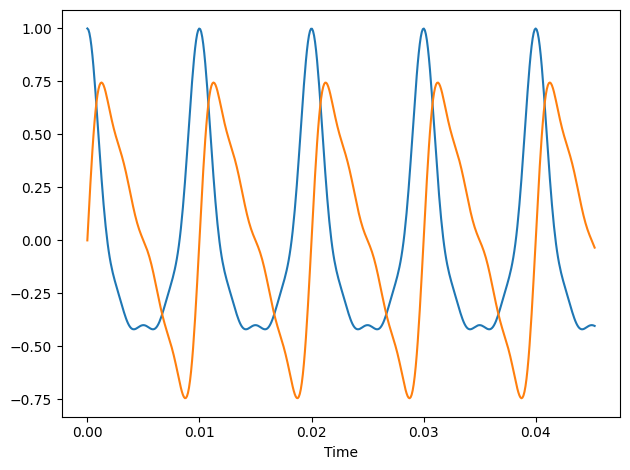

In [23]:
n = 500
plt.plot(ts[:n], ys[:n].real)
plt.plot(ts[:n], ys[:n].imag)
decorate(xlabel='Time')

In [24]:
from thinkdsp import Wave

wave = Wave(ys.real, framerate)
wave.apodize()
wave.make_audio()

In [25]:


wave = Wave(ys.imag, framerate)
wave.apodize()
wave.make_audio()



In [26]:


def synthesize2(amps, freqs, ts):
    args = np.outer(ts, freqs)
    M = np.exp(1j * PI2 * args)
    ys = np.dot(M, amps)
    return ys



In [27]:
amps = np.array([0.6, 0.25, 0.1, 0.05])
ys = synthesize2(amps, freqs, ts)
print(ys)

[1.   +0.j    0.995+0.091j 0.979+0.18j  ... 0.953-0.267j 0.979-0.18j
 0.995-0.091j]


In [28]:
wave = Wave(ys.real, framerate)
wave.apodize()
wave.make_audio()

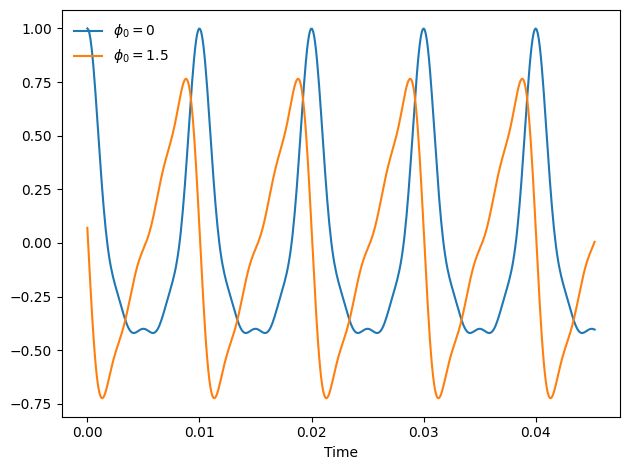

In [29]:
phi = 1.5
amps2 = amps * np.exp(1j * phi)
ys2 = synthesize2(amps2, freqs, ts)

n = 500
plt.plot(ts[:n], ys.real[:n], label=r'$\phi_0 = 0$')
plt.plot(ts[:n], ys2.real[:n], label=r'$\phi_0 = 1.5$')
decorate(xlabel='Time')

In [30]:
def analyze1(ys, freqs, ts):
    args = np.outer(ts, freqs)
    M = np.exp(1j * PI2 * args)
    amps = np.linalg.solve(M, ys)
    return amps

In [31]:
n = len(freqs)
amps2 = analyze1(ys[:n], freqs, ts[:n])
print(amps2)

[0.6 -0.j 0.25+0.j 0.1 -0.j 0.05+0.j]


In [32]:
N = 4
ts = np.arange(N) / N
freqs = np.arange(N)
args = np.outer(ts, freqs)
M = np.exp(1j * PI2 * args)
print(M)

[[ 1.+0.j  1.+0.j  1.+0.j  1.+0.j]
 [ 1.+0.j  0.+1.j -1.+0.j -0.-1.j]
 [ 1.+0.j -1.+0.j  1.-0.j -1.+0.j]
 [ 1.+0.j -0.-1.j -1.+0.j  0.+1.j]]


In [33]:


MstarM = M.conj().transpose().dot(M)
print(MstarM.real)



[[ 4. -0.  0.  0.]
 [-0.  4. -0.  0.]
 [ 0. -0.  4. -0.]
 [ 0.  0. -0.  4.]]


In [34]:
def analyze2(ys, freqs, ts):
    args = np.outer(ts, freqs)
    M = np.exp(1j * PI2 * args)
    amps = M.conj().transpose().dot(ys) / N
    return amps

In [35]:
N = 4
amps = np.array([0.6, 0.25, 0.1, 0.05])
freqs = np.arange(N)
ts = np.arange(N) / N
ys = synthesize2(amps, freqs, ts)

amps3 = analyze2(ys, freqs, ts)
print(amps3)

[0.6 +0.j 0.25+0.j 0.1 -0.j 0.05-0.j]


In [36]:
def synthesis_matrix(N):
    ts = np.arange(N) / N
    freqs = np.arange(N)
    args = np.outer(ts, freqs)
    M = np.exp(1j * PI2 * args)
    return M

In [37]:


def dft(ys):
    N = len(ys)
    M = synthesis_matrix(N)
    amps = M.conj().transpose().dot(ys)
    return amps



In [38]:
print(dft(ys))

[2.4+0.j 1. +0.j 0.4-0.j 0.2-0.j]


In [39]:
print(np.fft.fft(ys))

[2.4+0.j 1. -0.j 0.4-0.j 0.2-0.j]


In [40]:
def idft(amps):
    N = len(amps)
    M = synthesis_matrix(N)
    ys = M.dot(amps) / N
    return ys

In [41]:


ys = idft(amps)
print(dft(ys))



[0.6 +0.j 0.25+0.j 0.1 -0.j 0.05-0.j]


In [42]:
from thinkdsp import SawtoothSignal

framerate = 10000
signal = SawtoothSignal(freq=500)
wave = signal.make_wave(duration=0.1, framerate=framerate)
wave.make_audio()

In [43]:
hs = dft(wave.ys)
len(wave.ys), len(hs)

(1000, 1000)

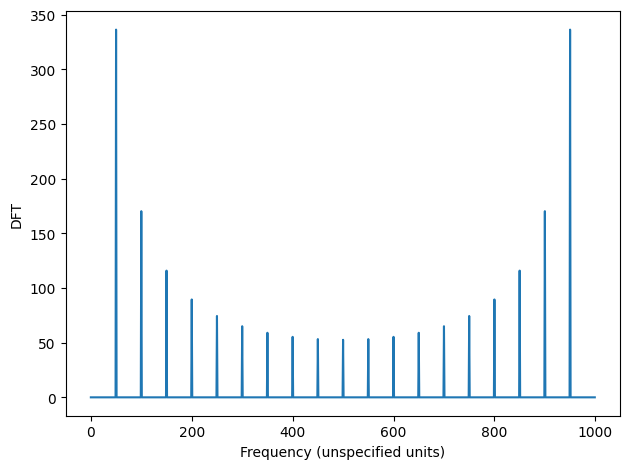

In [44]:
amps = np.abs(hs)
plt.plot(amps)
decorate(xlabel='Frequency (unspecified units)', ylabel='DFT')

In [45]:
N = len(hs)
fs = np.arange(N) * framerate / N

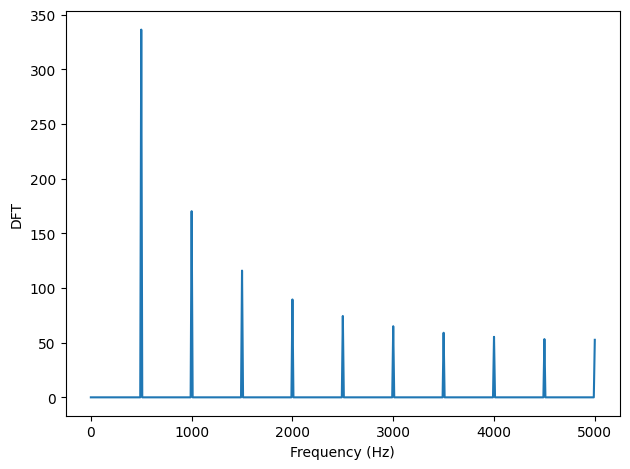

In [46]:


plt.plot(fs[:N//2+1], amps[:N//2+1])
decorate(xlabel='Frequency (Hz)', ylabel='DFT')



In [47]:
M = synthesis_matrix(N=8)

In [48]:
Mstar = M.conj().transpose()

In [49]:
from thinkdsp import TriangleSignal

wave = TriangleSignal(freq=1).make_wave(duration=1, framerate=8)
wave.ys

array([ 1. ,  0.5,  0. , -0.5, -1. , -0.5,  0. ,  0.5])

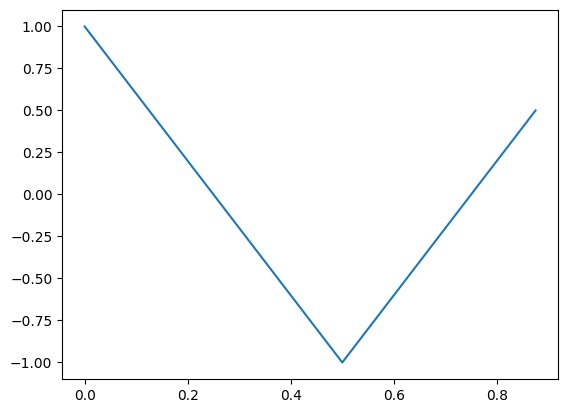

In [50]:
wave.plot()

In [51]:
row3 = Mstar[3, :]
print(row3)

[ 1.   -0.j    -0.707-0.707j -0.   +1.j     0.707-0.707j -1.   -0.j
  0.707+0.707j  0.   -1.j    -0.707+0.707j]


In [52]:
row5 = Mstar[5, :]
row5

array([ 1.   -0.j   , -0.707+0.707j,  0.   -1.j   ,  0.707+0.707j,
       -1.   -0.j   ,  0.707-0.707j, -0.   +1.j   , -0.707-0.707j])

In [53]:
def approx_equal(a, b, tol=1e-10):
    return np.sum(np.abs(a-b)) < tol

In [54]:
approx_equal(row3, row5.conj())

True

In [55]:
X3 = row3.dot(wave.ys)
X3

(0.5857864376269055-1.1102230246251565e-16j)

In [56]:


X5 = row5.dot(wave.ys)
X5



(0.5857864376269062-5.551115123125783e-16j)

In [57]:
abs(X3 - X5)

8.005932084973442e-16

[0.    0.125 0.25  0.375 0.5   0.625 0.75  0.875]
[0.    0.785 1.571 2.356 3.142 3.927 4.712 5.498]


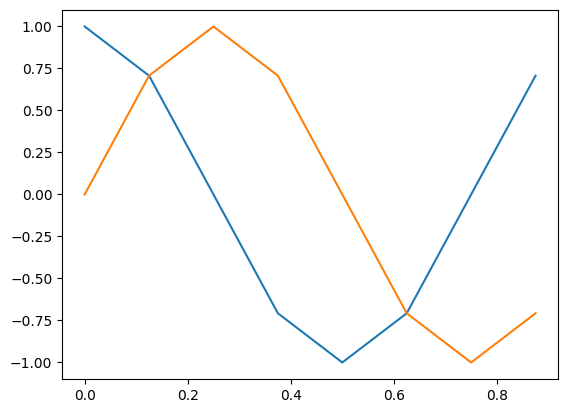

In [58]:
wave2 = ComplexSinusoid(freq=1).make_wave(duration=1, framerate=8)
plt.plot(wave2.ts, wave2.ys.real)
plt.plot(wave2.ts, wave2.ys.imag)

In [59]:
X3 = row3.dot(wave2.ys)
X3

(1.4432899320127035e-15-2.7755575615628914e-16j)

In [60]:
X5 = row5.dot(wave2.ys)
X5

3.3306690738754696e-16j

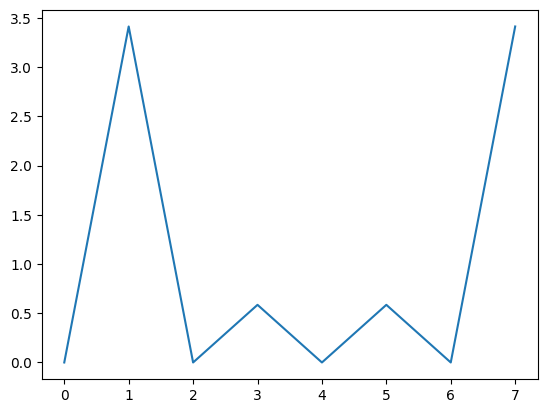

In [61]:
hs = np.fft.fft(wave.ys)
plt.plot(abs(hs))

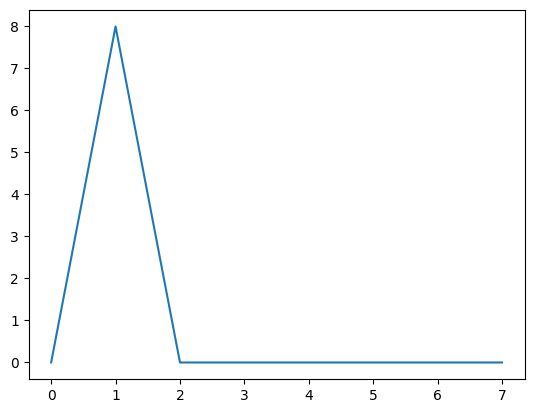

In [62]:
hs = np.fft.fft(wave2.ys)
plt.plot(abs(hs))

In [63]:
N = 8
ts = np.arange(N) / N
freqs = np.arange(N)
freqs = [0, 1, 2, 3, 4, -3, -2, -1]
args = np.outer(ts, freqs)
M2 = np.exp(1j * PI2 * args)

In [64]:
approx_equal(M, M2)

True

In [65]:
framerate = 10000
signal = SawtoothSignal(freq=500)
wave = signal.make_wave(duration=0.1, framerate=framerate)

In [66]:
spectrum = wave.make_spectrum(full=True)

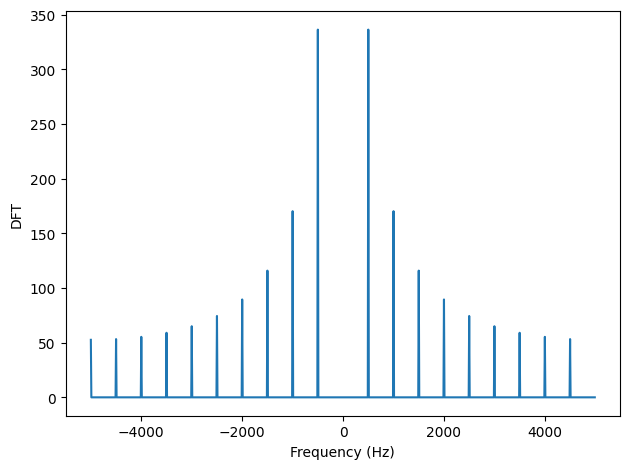

In [67]:
spectrum.plot()
decorate(xlabel='Frequency (Hz)', ylabel='DFT')

EXERCISE 7.2

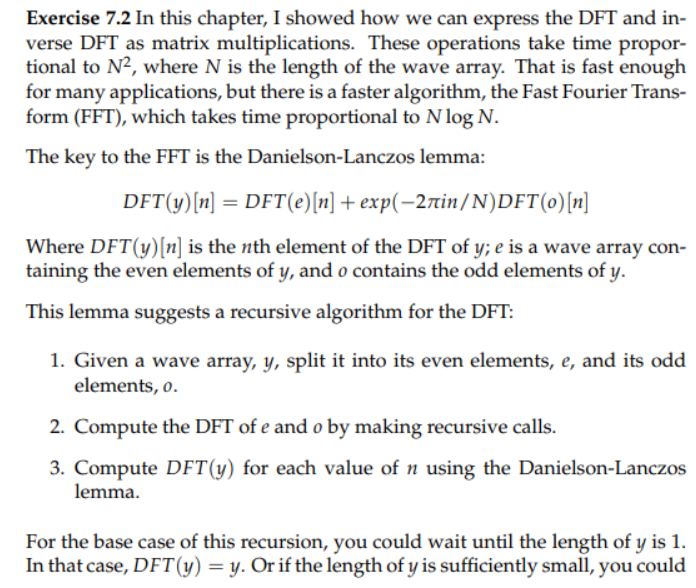
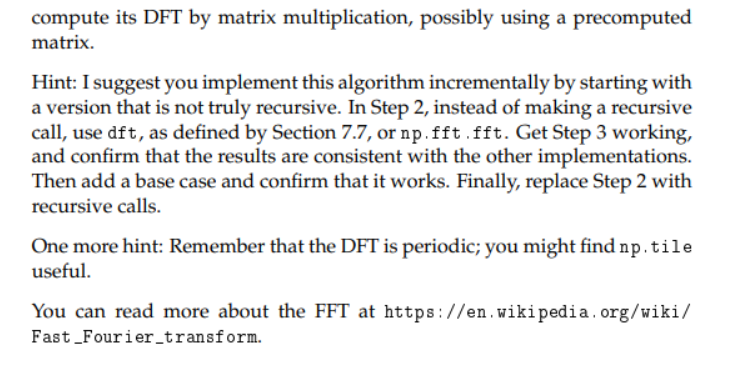

In [68]:
import numpy as np
PI2 = 2 * np.pi

In [69]:
ys = [-0.5, 0.1, 0.7, -0.1]
hs = np.fft.fft(ys)
print(hs)

[ 0.2+0.j  -1.2-0.2j  0.2+0.j  -1.2+0.2j]


In [70]:
def dft(ys):
    N = len(ys)
    ts = np.arange(N) / N
    freqs = np.arange(N)
    args = np.outer(ts, freqs)
    M = np.exp(1j * PI2 * args)
    amps = M.conj().transpose().dot(ys)
    return amps

In [71]:
hs2 = dft(ys)
np.sum(np.abs(hs - hs2))

5.864775846765962e-16

In [72]:
def fft_norec(ys):
    N = len(ys)
    He = np.fft.fft(ys[::2])
    Ho = np.fft.fft(ys[1::2])
    
    ns = np.arange(N)
    W = np.exp(-1j * PI2 * ns / N)
    
    return np.tile(He, 2) + W * np.tile(Ho, 2)

In [73]:
hs3 = fft_norec(ys)
np.sum(np.abs(hs - hs3))

0.0

In [74]:
def fft(ys):
    N = len(ys)
    if N == 1:
        return ys
    
    He = fft(ys[::2])
    Ho = fft(ys[1::2])
    
    ns = np.arange(N)
    W = np.exp(-1j * PI2 * ns / N)
    
    return np.tile(He, 2) + W * np.tile(Ho, 2)

In [76]:
hs4 = fft(ys)
np.sum(np.abs(hs - hs4))

1.6653345369377348e-16